In [15]:
import os
from snn_delays.config import CHECKPOINT_PATH
from snn_delays.utils.model_loader import ModelLoader
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from snn_delays.utils.results_utils import get_results

#ckpt_dir = 'abl1_shd50'
ckpt_dir2 = 'abl7_ssc50_rnn'
ckpt_dir3 = 'abl7_ssc50_mf'
ckpt_dir4 = 'abl7_ssc50_rd'

# # delays
# sweep_params_names = {
#     'connection_type': ['f'],
#     'delay': ['d'],
#     'structure':['2l'],
#     'tau_m':['ht'],
#     'T_freeze_taus':['ft', 'tt']
#     }

# recurrent
sweep_params_names2 = {
    'connection_type': ['r'],
    'delay': ['nd'],
    'structure':['2l'],
    'tau_m':['ht'],
    'T_freeze_taus':['ft', 'tt']
    }

# multi-feedforward
sweep_params_names3 = {
    'connection_type': ['mf'],
    'delay': ['nd'],
    'structure':['2l'],
    'tau_m':['ht'],
    'T_freeze_taus':['ft', 'tt']
    }

sweep_params_names4 = {
    'connection_type': ['f'],
    'delay': ['rd'],
    'structure':['2l'],
    'tau_m':['ht'],
    'T_freeze_taus':['ft', 'tt']
    }


# acc_d, spk_d, spkt_d, _, _, _, _ = get_results(ckpt_dir, sweep_params_names, rpts=10)
# _, _, _, trnloss_d, tstloss_d, _, _ = get_results(ckpt_dir, sweep_params_names, rpts=10, mode='last')

acc_r, spk_r, spkt_r, _, _, _, _ = get_results(ckpt_dir2, sweep_params_names2, rpts=3)
_, _, _, trnloss_r, tstloss_r, _, _ = get_results(ckpt_dir2, sweep_params_names2, rpts=3, mode='last')

acc_mf, spk_mf, spkt_mf, _, _, _, _ = get_results(ckpt_dir3, sweep_params_names3, rpts=3)
_, _, _, trnloss_mf, tstloss_mf, _, _ = get_results(ckpt_dir3, sweep_params_names3, rpts=3, mode='last')

acc_rd, spk_rd, spkt_rd, _, _, _, _ = get_results(ckpt_dir4, sweep_params_names4, rpts=3)
_, _, _, trnloss_rd, tstloss_rd, _, _ = get_results(ckpt_dir4, sweep_params_names4, rpts=3, mode='last')

f_rd_2l_ht_tt_rpt2_5416544009420077_last_100epoch

[INFO] Delays: tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
        36, 37, 38, 39])

[INFO] Delays i: tensor([0])

[INFO] Delays h: tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
        36, 37, 38, 39])

[INFO] Delays o: tensor([0])
1000.0
Delta t: 20.0 ms
mean of normal: -0.541324854612918
Instance of <class 'snn_delays.experimental_models.snn_delay_prun.P_DelaySNN'> loaded successfully


In [16]:
def plot_boxplots(df):
    sns.set_theme(style="whitegrid")
    # Create the boxplot with customizations
    
    boxplot = sns.boxplot(data=df, palette="Set3")  # Use a color palette to add color

    # Rotate x-axis labels for readability
    plt.xticks(rotation=45, ha='right', fontsize=10, color='darkred')

    # Add a grid with custom style
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Optional: Show median labels on each box
    for i, patch in enumerate(boxplot.artists):
        median_val = df.iloc[:, i].median()
        boxplot.text(i, median_val + 0.5, f'{median_val:.1f}%', ha='center', color='black', fontsize=10)

    return plt.gca()

## Recurrent vs feedforward + delays vs multi-feedforward

Text(0, 0.5, 'Spikes per neuron per timestep')

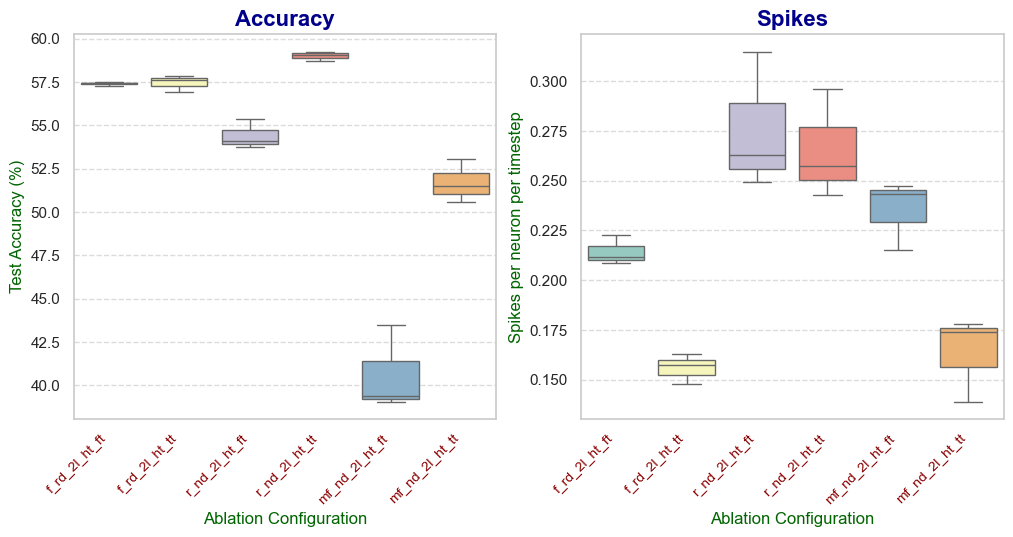

In [17]:
df_acc = pd.DataFrame(acc_rd | acc_r | acc_mf)
df_spk = pd.DataFrame(spk_rd | spk_r | spk_mf)
plt.figure(figsize=(12, 5))
plt.subplot(121)
plot_boxplots(df_acc)
plt.title("Accuracy", fontsize=16, fontweight='bold', color='darkblue')
plt.xlabel("Ablation Configuration", fontsize=12, color='darkgreen')
plt.ylabel("Test Accuracy (%)", fontsize=12, color='darkgreen')
plt.subplot(122)
plot_boxplots(df_spk)
plt.title("Spikes", fontsize=16, fontweight='bold', color='darkblue')
plt.xlabel("Ablation Configuration", fontsize=12, color='darkgreen')
plt.ylabel("Spikes per neuron per timestep", fontsize=12, color='darkgreen')

Learning curves

In [18]:
import numpy as np
def plot_losses(nested_loss_lists, label='Mean loss', color='blue', linestyle='-'):

    # Example data: replace `nested_loss_lists` with your actual data
    #nested_loss_lists = tstloss_d['f_d_2l_hm_ft']

    # Ensure all lists have the same length and epoch indices
    epochs = [entry[0] for entry in nested_loss_lists[0]]  # Epochs
    all_losses = [np.array([entry[1] for entry in lst]) for lst in nested_loss_lists]

    print(np.array(all_losses))

    # Calculate average and standard deviation
    mean_losses = np.mean(all_losses, axis=0)
    std_losses = np.std(all_losses, axis=0)

    # Plot the average loss curve with error bars
    #plt.figure(figsize=(10, 6))
    plt.plot(epochs, mean_losses, label=label, color=color, linestyle=linestyle)
    #plt.fill_between(epochs, mean_losses - std_losses, mean_losses + std_losses, color=color, alpha=0.2, label='±1 Std Dev')
    plt.fill_between(epochs, mean_losses - std_losses, mean_losses + std_losses, color=color, alpha=0.2)
    #plt.title("Average Loss Curve")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.grid(True)
    return plt.gca()

[[3.19942412 2.45717823 2.07456771 1.88237177 1.76050482 1.67275697
  1.6133002  1.57653069 1.51555073 1.47994136 1.44040064 1.41282262
  1.39929141 1.37314512 1.34930772 1.33027734 1.31021407 1.29621042
  1.28217104 1.26730397 1.2423321  1.22435994 1.21899021 1.1932448
  1.1885654  1.17894705 1.16226103 1.1588345  1.15087046 1.13516109
  1.11719524 1.10964049 1.10948832 1.0994888  1.08977834 1.07472001
  1.07501727 1.0700648  1.0580368  1.06924904 1.04087052 1.0354926
  1.02429107 1.02717356 1.01506592 1.01046514 0.99705376 0.9881041
  0.9982422  0.99701551 0.97788008 0.96842901 0.98212821 0.9627177
  0.96208727 0.95008944 0.95459476 0.9469457  0.93933185 0.94286297
  0.92528944 0.92954048 0.91672869 0.91338238 0.9153731  0.91120546
  0.90557235 0.90223121 0.89783279 0.89793957 0.88618602 0.88255976
  0.88992035 0.87846132 0.8721926  0.8756057  0.86348122 0.8657654
  0.87275855 0.86717506 0.85719604 0.84625224 0.85783535 0.84533429
  0.84473458 0.84577912 0.85279934 0.84299437 0.83378

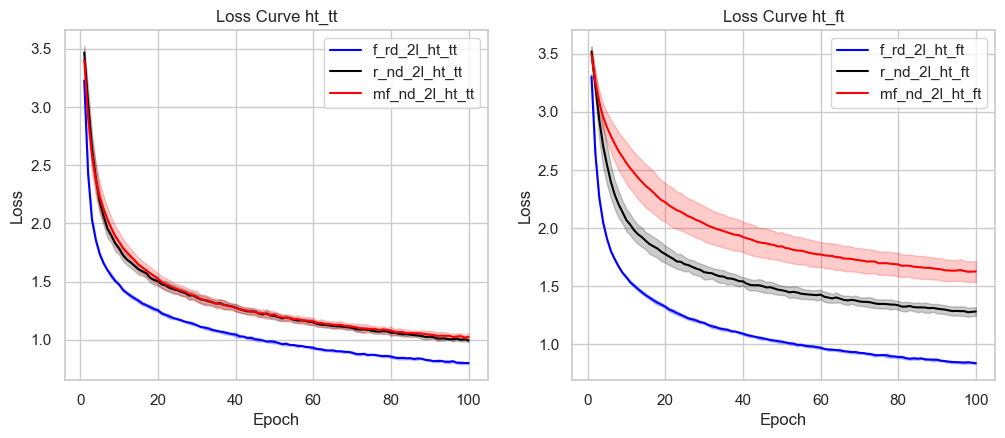

In [19]:
#all_train_losses = trnloss_d | trnloss_r | trnloss_mf | trnloss_rd
all_train_losses = trnloss_rd | trnloss_r | trnloss_mf 

filtered_ht_tt = {key:value for key, value in all_train_losses.items() if 'ht_tt' in key}
filtered_ht_ft = {key:value for key, value in all_train_losses.items() if 'ht_ft' in key}
# filtered_hm_tt = {key:value for key, value in all_train_losses.items() if 'hm_tt' in key}
# filtered_hm_ft = {key:value for key, value in all_train_losses.items() if 'hm_ft' in key}

import itertools
colors = itertools.cycle(["blue", "black", 'red'])

plt.figure(figsize=(12,10))
plt.subplot(221)
for key, value in filtered_ht_tt.items():
    plt.title('Loss Curve ht_tt')
    plot_losses(value, label=key, color=next(colors))
plt.subplot(222)
for key, value in filtered_ht_ft.items():
    plt.title('Loss Curve ht_ft')
    plot_losses(value, label=key, color=next(colors))
# plt.subplot(223)
# for key, value in filtered_hm_tt.items():
#     plt.title('Loss Curve hm_tt')
#     plot_losses(value, label=key, color=next(colors))
# plt.subplot(224)
# for key, value in filtered_hm_ft.items():
#     plt.title('Loss Curve ht_ft')
#     plot_losses(value, label=key, color=next(colors))
# # plot_losses(tstloss_d['f_d_2l_hm_ft'], color='red')

[[2.76329684 2.26046937 1.96237174 1.86588798 1.78487923 1.74738903
  1.68019989 1.67140989 1.63958427 1.64922243 1.59976205 1.63103416
  1.62201898 1.61874503 1.60137722 1.59702191 1.60991803 1.64036573
  1.64028309 1.61244042 1.61091191 1.63524153 1.60508173 1.62035185
  1.62193906 1.63109508 1.65598035 1.64307292 1.63282388 1.66947387
  1.63041083 1.66987767 1.64946182 1.67983162 1.69213325 1.6649096
  1.68292575 1.66949279 1.71351209 1.67779348 1.71425074 1.73215992
  1.74185232 1.71615584 1.74189721 1.74249282 1.75297279 1.77122524
  1.77503673 1.76933556 1.77170417 1.76613666 1.79099767 1.77262881
  1.76796976 1.79958847 1.75651675 1.76953809 1.79726076 1.84789827
  1.79707395 1.80719817 1.82377357 1.84951778 1.84663276 1.83786715
  1.81110975 1.87654254 1.86881208 1.84604068 1.85889183 1.88124984
  1.84845863 1.84793779 1.86681483 1.87514848 1.89631769 1.90765548
  1.89491577 1.86766167 1.90948464 1.90228655 1.90331488 1.90187153
  1.89358678 1.92196705 1.8964435  1.90926871 1.9

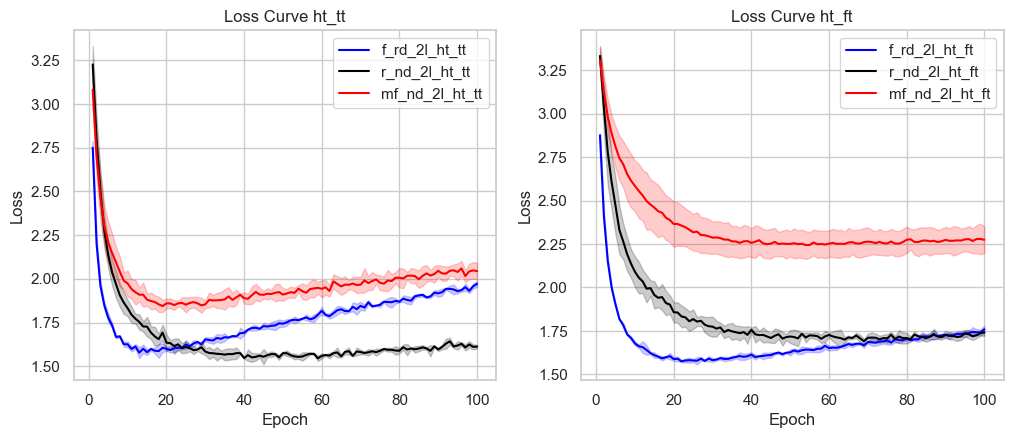

In [21]:
all_test_losses = tstloss_rd | tstloss_r | tstloss_mf 
filtered_ht_tt = {key:value for key, value in all_test_losses.items() if 'ht_tt' in key}
filtered_ht_ft = {key:value for key, value in all_test_losses.items() if 'ht_ft' in key}
# filtered_hm_tt = {key:value for key, value in all_test_losses.items() if 'hm_tt' in key}
# filtered_hm_ft = {key:value for key, value in all_test_losses.items() if 'hm_ft' in key}

import itertools
colors = itertools.cycle(["blue", "black", 'red'])

plt.figure(figsize=(12,10))
plt.subplot(221)
for key, value in filtered_ht_tt.items():
    plt.title('Loss Curve ht_tt')
    plot_losses(value, label=key, color=next(colors))
plt.subplot(222)
for key, value in filtered_ht_ft.items():
    plt.title('Loss Curve ht_ft')
    plot_losses(value, label=key, color=next(colors))
# plt.subplot(223)
# for key, value in filtered_hm_tt.items():
#     plt.title('Loss Curve hm_tt')
#     plot_losses(value, label=key, color=next(colors))
# plt.subplot(224)
# for key, value in filtered_hm_ft.items():
#     plt.title('Loss Curve hm_ft')
#     plot_losses(value, label=key, color=next(colors))
# # plot_losses(tstloss_d['f_d_2l_hm_ft'], color='red')